### Bonus Analysis

In [1]:
# Import dependencies:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import url

In [2]:
# Creating engine to access the database:
engine = create_engine(url)
connection = engine.connect()

In [3]:
# Reading the 'salaries' CSV file:
emp_salaries = pd.read_sql("SELECT * FROM salaries", connection)
emp_salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


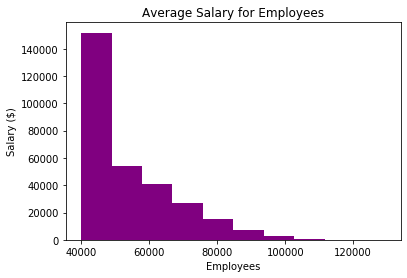

In [4]:
# Creating a histogram to visualize the most common salary ranges for employees:
emp_salaries['salary'].plot(kind='hist', color='purple')
plt.title('Average Salary for Employees')
plt.xlabel('Employees')
plt.ylabel('Salary ($)')
plt.show()

In [5]:
# Reading the 'employees' and 'titles' CSV files:
employees = pd.read_sql("SELECT * FROM employees", connection)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
emp_titles = pd.read_sql("SELECT * FROM titles", connection)
emp_titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
# Merging 'employees' and 'salaries' first:
emp_salary_merge = pd.merge(employees, emp_salaries, on='emp_no', how='inner')
emp_salary_merge.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
# Renaming the column 'emp_title_id' to match the other dataframe upon final merge:
emp_salary_merge = emp_salary_merge.rename(columns={'emp_title_id': 'title_id'})
emp_salary_merge.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [9]:
# Final merging 'emp_salary_merge' and 'titles' last:
emp_salaries_by_title = pd.merge(emp_salary_merge, emp_titles, on='title_id', how='inner')
emp_salaries_by_title.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [10]:
# Grouping by 'title' and averaging the 'salaries':
avg_salary_by_title = emp_salaries_by_title.groupby('title')['salary'].mean()
avg_salary_by_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

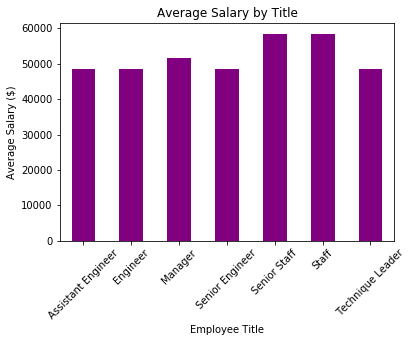

In [11]:
# Creating a bar chart of average salary by title:
avg_salary_by_title.plot(kind='bar', color='purple', rot=45)

plt.title("Average Salary by Title")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary ($)")
plt.show()